# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

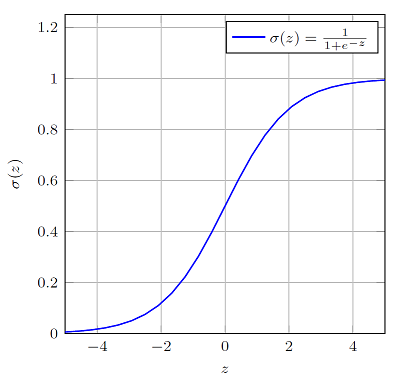

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

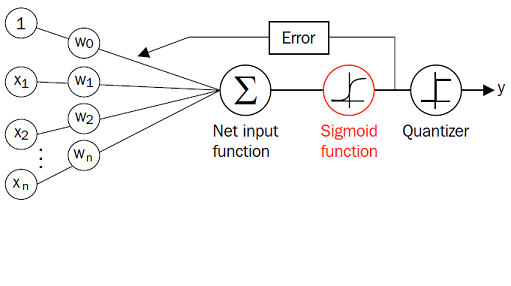

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$. The predicted probability can be converted into a binary outcome via a quantizer (unit step function):

\begin{equation}
y_{pred} = \begin{cases}
      1 & \sigma(z)\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N}\sum -y_{n}\cdot\log\left(y_{pred}\right)-\left(1-y\right)\cdot\log\left(1-y_{pred}\right)
\end{equation}
where $y_{n}$ is the label  for training example $n$, $y_{pred}$ is the predicted class.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

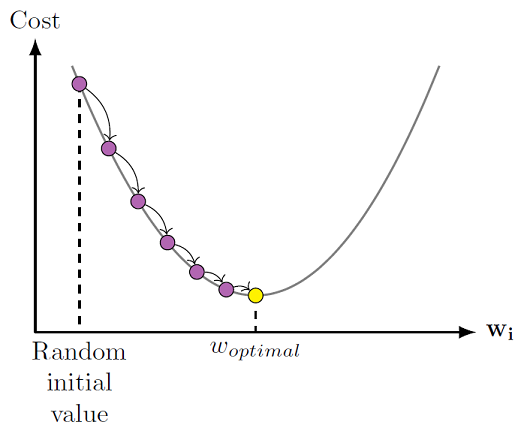


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()

In [4]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

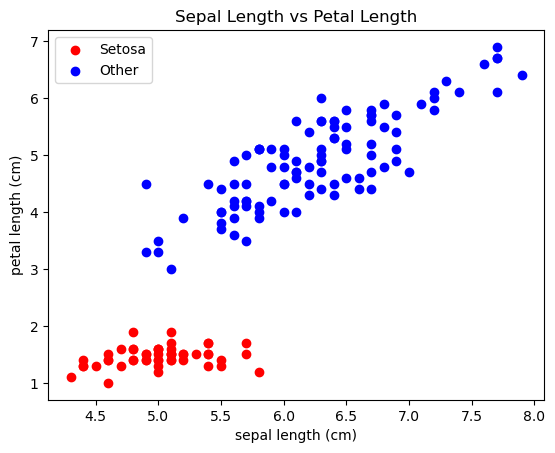

In [7]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
#Iris-Setosa is selected, everything else is 0
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [8]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [9]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [10]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [11]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [12]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 1 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00166667 0.01258333 0.0137625 ] 	
iteration: 2 	 cost: 0.6602266619373448 	 weights: [0.00301818 0.02326492 0.02620654] 	
iteration: 3 	 cost: 0.6347567605566681 	 weights: [0.0040976  0.03230444 0.0375113 ] 	
iteration: 4 	 cost: 0.6148967833463442 	 weights: [0.00494318 0.03993291 0.04783671] 	
iteration: 5 	 cost: 0.599251946796079 	 weights: [0.00558805 0.04635057 0.05732152] 	
iteration: 6 	 cost: 0.5867797523220423 	 weights: [0.00606052 0.05172839 0.06608421] 	
iteration: 7 	 cost: 0.5767053776384059 	 weights: [0.00638458 0.05621131 0.07422506] 	
iteration: 8 	 cost: 0.56845319074388 	 weights: [0.00658055 0.0599218  0.08182872] 	
iteration: 9 	 cost: 0.56159433961126 	 weights: [0.0066656  0.06296341 0.08896661] 	
iteration: 10 	 cost: 0.5558078115128905 	 weights: [0.00665431 0.06542383 0.09569908] 	
iteration: 11 	 cost: 0.5508519235327939 	 weights: [0.00655907 0.06737759 0.10207731] 	
iteration: 12 	 cost: 0.54654357448

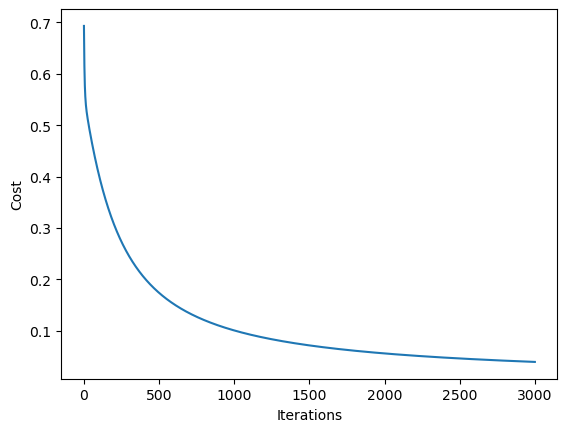

In [13]:
alpha = 0.01 #Learning Rate
num_iter = 3000

# Splitting for 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
model_weights = fit(alpha, num_iter, X_train,y_train)



In [14]:
predictions = predict(X_train, model_weights)
pred = predictions.astype('int')
true = y_train.astype('int')
print("Number of predictions:", len(predictions))


Number of predictions: 120


# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


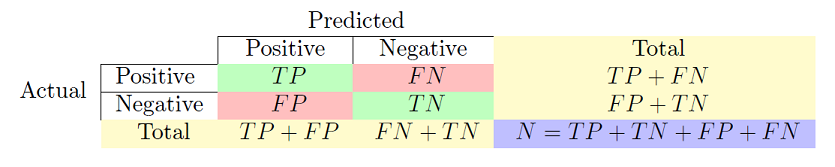

In [15]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

print("Length of true:", len(true))
print("Length of pred:", len(pred))

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

#Calculate Confusion Matri and total accuracy.
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Length of true: 120
Length of pred: 120
Confusion matrix result: 
[[40.  0.]
 [ 0. 80.]]
accuracy = 100.00%


In [16]:
predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')
print("Number of predictions:", len(predictions))



Number of predictions: 30


In [17]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

print("Length of true:", len(true))
print("Length of pred:", len(pred))


conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

#Calculate Confusion Matri and total accuracy.
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Length of true: 30
Length of pred: 30
Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%


## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


# Importance of having two datasets.
  If we don't have two datasets, we will be using all of our available data to train the algorithm. However, we will not have any data to test the algorithm. Therefore we need to test the data at the same to esnrue we have constructed a good model with low innaccuracy.
  In machine learning, the training set is pivotal for optimizing a model's parameters, minimizing training error. Yet, the ultimate aim is to create a model that performs well on new, unseen data—a process evaluated by the testing set. This distinct dataset serves as a stand-in for unfamiliar instances, ensuring the model's generalization ability beyond the training data. Additionally, the testing set is instrumental in preventing overfitting, a phenomenon where a model excessively tailors itself to training data, capturing noise rather than patterns. Detecting overfitting is critical; if a model excels on the training set but falters on the testing set, it necessitates adjustments to model complexity. Without separate training and testing datasets, we risk using all available data for training, hindering our ability to evaluate the model's performance on novel instances. This separation is fundamental to constructing robust models that not only minimize inaccuracy during training but also showcase resilience and effectiveness in real-world scenarios.

# Code for splitting data

from sklearn.model_selection import train_test_split #Importing a module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
  This code uses the sklearn library to split all of the data X into a testing set with relative size of 20% of the original size. This leaves 80% of the data for training our model. Random state 69, acts as a seed that ensures when we run this code multiple times, the same randomly selected data is categorised as testing and training data.

# Confusion Matrix and Accuracy

On the training set we expect an accuracy of 100 and this is what we get.
[[40.  0.]
 [ 0. 80.]]
accuracy = 100.00%

Fortunately on the testing set we also get 100% and the confusion matrix:

Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%

After testing and playing with the learning rate and the number of iterations, I can confirm that 100% is achieved due to having optimal values for learning rate and a high number of iterations. From this I can conclude that the models effectiveness is extremely high when given suitable hyperparameter values that don't result in overfitting or underfitting.



## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.


iteration: 1 	 cost: 0.6931471805599435 	 weights: [1.66666667e-05 1.25833333e-04 1.37625000e-04] 	
iteration: 2 	 cost: 0.6927968694793462 	 weights: [3.33017673e-05 2.51476169e-04 2.75117908e-04] 	
iteration: 3 	 cost: 0.6924474108289876 	 weights: [4.99053427e-05 3.76928753e-04 4.12478892e-04] 	
iteration: 4 	 cost: 0.692098802422593 	 weights: [6.64774337e-05 5.02191330e-04 5.49708121e-04] 	
iteration: 5 	 cost: 0.6917510420786095 	 weights: [8.30180812e-05 6.27264146e-04 6.86805763e-04] 	
iteration: 6 	 cost: 0.6914041276202044 	 weights: [9.95273260e-05 7.52147446e-04 8.23771986e-04] 	
iteration: 7 	 cost: 0.6910580568752628 	 weights: [0.00011601 0.00087684 0.00096061] 	
iteration: 8 	 cost: 0.6907128276763856 	 weights: [0.00013245 0.00100135 0.00109731] 	
iteration: 9 	 cost: 0.6903684378608881 	 weights: [0.00014887 0.00112566 0.00123388] 	
iteration: 10 	 cost: 0.6900248852707963 	 weights: [0.00016525 0.00124979 0.00137033] 	
iteration: 11 	 cost: 0.6896821677528461 	 weigh

iteration: 153 	 cost: 0.6485266806271487 	 weights: [0.00220627 0.01717774 0.01961716] 	
iteration: 154 	 cost: 0.6482834808239775 	 weights: [0.00221856 0.01727719 0.01973647] 	
iteration: 155 	 cost: 0.6480408530354715 	 weights: [0.00223083 0.01737648 0.01985568] 	
iteration: 156 	 cost: 0.6477987957412433 	 weights: [0.00224308 0.01747562 0.01997478] 	
iteration: 157 	 cost: 0.6475573074248046 	 weights: [0.00225529 0.0175746  0.02009377] 	
iteration: 158 	 cost: 0.6473163865735588 	 weights: [0.00226749 0.01767343 0.02021266] 	
iteration: 159 	 cost: 0.6470760316787942 	 weights: [0.00227965 0.01777211 0.02033144] 	
iteration: 160 	 cost: 0.6468362412356761 	 weights: [0.0022918  0.01787063 0.02045011] 	
iteration: 161 	 cost: 0.6465970137432389 	 weights: [0.00230391 0.017969   0.02056867] 	
iteration: 162 	 cost: 0.6463583477043798 	 weights: [0.002316   0.01806721 0.02068713] 	
iteration: 163 	 cost: 0.6461202416258509 	 weights: [0.00232807 0.01816527 0.02080548] 	
iteration:

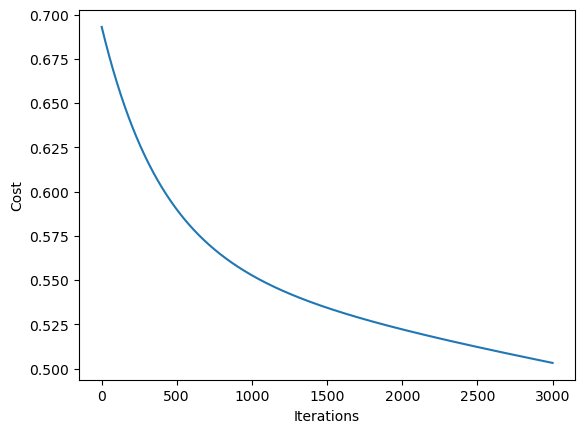

Final weights: [-0.0029585   0.05745585  0.18926399]
Number of predictions: 30
Confusion matrix result: 
[[ 0. 10.]
 [ 0. 20.]]
accuracy = 66.67%


In [18]:
#Alpha value of 0.0001
alpha = 0.0001 #Learning Rate
num_iter = 3000

# Splitting for 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
model_weights = fit(alpha, num_iter, X_train,y_train)
print("Final weights:", model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')
print("Number of predictions:", len(predictions))

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

#Calculate Confusion Matri and total accuracy.
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))


iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00016667 0.00125833 0.00137625] 	
iteration: 2 	 cost: 0.6896632738758353 	 weights: [0.00033018 0.00249762 0.00273929] 	
iteration: 3 	 cost: 0.6862636252114578 	 weights: [0.00049057 0.0037181  0.00408929] 	
iteration: 4 	 cost: 0.6829460766258816 	 weights: [0.00064789 0.00492002 0.00542642] 	
iteration: 5 	 cost: 0.6797085177819994 	 weights: [0.00080218 0.00610364 0.00675085] 	
iteration: 6 	 cost: 0.6765488856194006 	 weights: [0.00095347 0.00726918 0.00806275] 	
iteration: 7 	 cost: 0.6734651639684338 	 weights: [0.00110181 0.0084169  0.00936227] 	
iteration: 8 	 cost: 0.6704553831106779 	 weights: [0.00124723 0.00954703 0.01064959] 	
iteration: 9 	 cost: 0.6675176192908135 	 weights: [0.00138979 0.01065981 0.01192487] 	
iteration: 10 	 cost: 0.6646499941846274 	 weights: [0.0015295  0.01175547 0.01318827] 	
iteration: 11 	 cost: 0.6618506743276455 	 weights: [0.00166642 0.01283424 0.01443995] 	
iteration: 12 	 cost: 0.659117

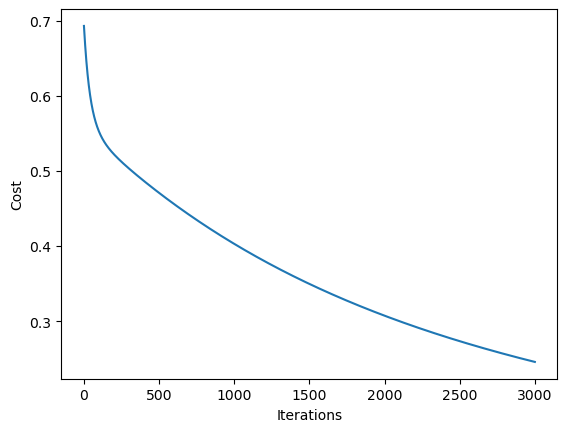

Final weights: [-0.1511907  -0.33995039  0.89187832]
Number of predictions: 30
Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%


In [33]:
#Alpha value of 0.1
alpha = 0.001 #Learning Rate
num_iter = 3000

# Splitting for 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
model_weights = fit(alpha, num_iter, X_train,y_train)
print("Final weights:", model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')
print("Number of predictions:", len(predictions))

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

#Calculate Confusion Matri and total accuracy.
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.16666667 1.25833333 1.37625   ] 	
iteration: 2 	 cost: 2.808057748979285 	 weights: [-0.16657942 -0.39541485  0.88887333] 	
iteration: 3 	 cost: 0.24830144952967484 	 weights: [-0.15532087 -0.21073111  1.25086084] 	
iteration: 4 	 cost: 0.36346359670775313 	 weights: [-0.36259119 -1.23071602  0.97106475] 	
iteration: 5 	 cost: 2.256628133978164 	 weights: [0.27665053 2.7745152  4.08343909] 	
iteration: 6 	 cost: 6.672403573563822 	 weights: [-0.0566828   1.12034854  3.59593909] 	
iteration: 7 	 cost: 3.587379761447512 	 weights: [-0.39000562 -0.53376832  3.10845283] 	
iteration: 8 	 cost: 0.5766451309927769 	 weights: [-0.65841121 -1.86531708  2.71129732] 	
iteration: 9 	 cost: 0.36274752531663285 	 weights: [-0.42355511 -0.43897796  3.74065326] 	
iteration: 10 	 cost: 0.9786277124601658 	 weights: [-0.73556685 -1.98763019  3.28203809] 	
iteration: 11 	 cost: 0.11401427414657944 	 weights: [-0.64672294 -1.4606576   3.6483437 ] 	
ite

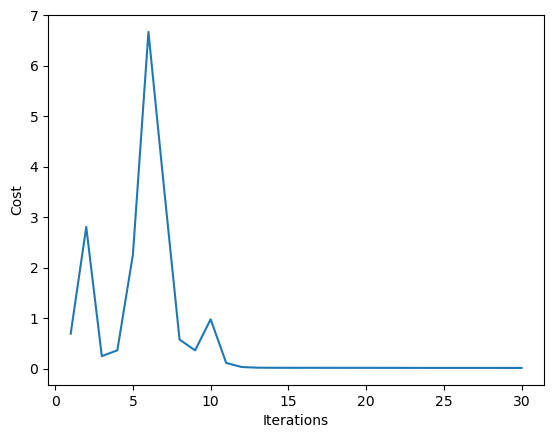

Final weights: [-0.72615053 -1.76491886  3.77353215]
Number of predictions: 30
Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%


In [35]:
#Alpha value of 1
alpha = 1 #Learning Rate
num_iter = 30

# Splitting for 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
model_weights = fit(alpha, num_iter, X_train,y_train)
print("Final weights:", model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')
print("Number of predictions:", len(predictions))

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

#Calculate Confusion Matri and total accuracy.
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 16.66666667 125.83333333 137.625     ] 	
iteration: 2 	 cost: 11.512925464970229 	 weights: [-16.66666667 -39.58333333  88.875     ] 	
iteration: 3 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -39.58333333  88.875     ] 	
iteration: 4 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -39.58333333  88.875     ] 	
iteration: 5 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -39.58333333  88.875     ] 	
iteration: 6 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -39.58333333  88.875     ] 	
iteration: 7 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -39.58333333  88.875     ] 	
iteration: 8 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -39.58333333  88.875     ] 	
iteration: 9 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -39.58333333  88.875     ] 	
iteration: 10 	 cost: -1.1102230246251561e-15 	 weights: [-16.66666667 -39.58333333  88.875     ] 	
iteration: 11 	 cos

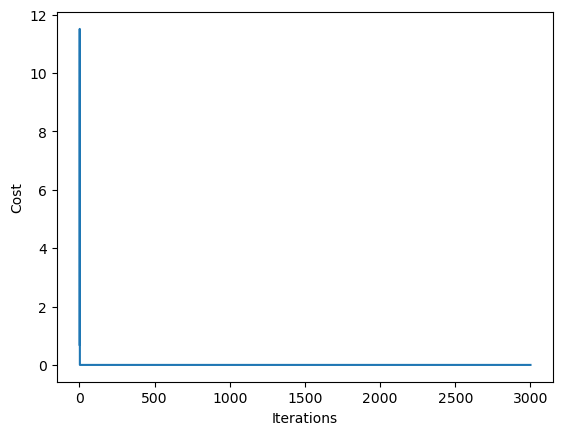

Final weights: [-16.66666667 -39.58333333  88.875     ]
Number of predictions: 30
Confusion matrix result: 
[[10.  0.]
 [ 0. 20.]]
accuracy = 100.00%


In [21]:
#Alpha value of 100
alpha = 100 #Learning Rate
num_iter = 3000

# Splitting for 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
model_weights = fit(alpha, num_iter, X_train,y_train)
print("Final weights:", model_weights)

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')
print("Number of predictions:", len(predictions))

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

#Calculate Confusion Matri and total accuracy.
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))